In [1]:
# Import our dependencies
import pandas as pd
import matplotlib as plt
from sklearn.datasets import make_blobs
import sklearn as skl
from tensorflow.python.keras.metrics import Metric
import tensorflow as tf

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

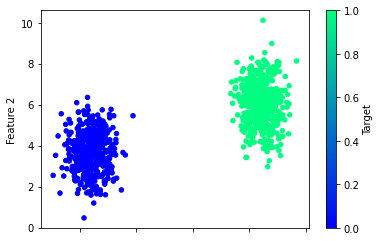

In [2]:
# Generate dummy dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=78)

# Creating a DataFrame with the dummy data
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])
df["Target"] = y

# Plotting the dummy data
df.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")

In [3]:
# Use sklearn to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [4]:
# Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [5]:
# Create the Keras Sequential model
nn_model = tf.keras.models.Sequential()

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

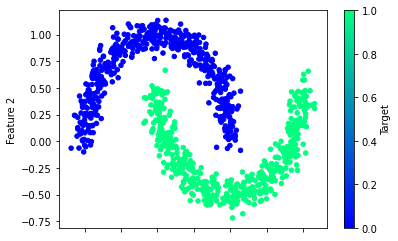

In [6]:
from sklearn.datasets import make_moons

# Creating dummy nonlinear data
X_moons, y_moons = make_moons(n_samples=1000, noise=0.08, random_state=78)

# Transforming y_moons to a vertical vector
y_moons = y_moons.reshape(-1, 1)

# Creating a DataFrame to plot the nonlinear dummy data
df_moons = pd.DataFrame(X_moons, columns=["Feature 1", "Feature 2"])
df_moons["Target"] = y_moons

# Plot the nonlinear dummy data
df_moons.plot.scatter(x="Feature 1",y="Feature 2", c="Target",colormap="winter")

In [7]:
# Create training and testing sets
X_moon_train, X_moon_test, y_moon_train, y_moon_test = train_test_split(
    X_moons, y_moons, random_state=78)

# Create the scaler instance
X_moon_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_moon_scaler.fit(X_moon_train)

# Scale the data
X_moon_train_scaled = X_moon_scaler.transform(X_moon_train)
X_moon_test_scaled = X_moon_scaler.transform(X_moon_test)

In [8]:
nn_model.compile(optimizer='adam', loss='mean_squared_error', metrics=[tf.keras.metrics.BinaryAccuracy()])

In [9]:
# Training the model with the nonlinear data
model_moon = nn_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 0s 1ms/step - loss: 1.5270 - binary_accuracy: 0.4400
Epoch 2/100
24/24 [==============================] - 0s 1ms/step - loss: 1.5701 - binary_accuracy: 0.4453
Epoch 3/100
24/24 [==============================] - 0s 1ms/step - loss: 1.5755 - binary_accuracy: 0.4486
Epoch 4/100
24/24 [==============================] - 0s 2ms/step - loss: 1.5623 - binary_accuracy: 0.4560
Epoch 5/100
24/24 [==============================] - 0s 2ms/step - loss: 1.5717 - binary_accuracy: 0.4334
Epoch 6/100
24/24 [==============================] - 0s 2ms/step - loss: 1.5777 - binary_accuracy: 0.4472
Epoch 7/100
24/24 [==============================] - 0s 2ms/step - loss: 1.4826 - binary_accuracy: 0.4583
Epoch 8/100
24/24 [==============================] - 0s 2ms/step - loss: 1.5673 - binary_accuracy: 0.4668
Epoch 9/100
24/24 [==============================] - 0s 2ms/step - loss: 1.5907 - binary_accuracy: 0.4418
Epoch 10/100
24/24 [==========================

24/24 [==============================] - 0s 2ms/step - loss: 1.5529 - binary_accuracy: 0.4407
Epoch 78/100
24/24 [==============================] - 0s 2ms/step - loss: 1.5627 - binary_accuracy: 0.4613
Epoch 79/100
24/24 [==============================] - 0s 5ms/step - loss: 1.6042 - binary_accuracy: 0.4525
Epoch 80/100
24/24 [==============================] - 0s 2ms/step - loss: 1.5896 - binary_accuracy: 0.4420
Epoch 81/100
24/24 [==============================] - 0s 2ms/step - loss: 1.5427 - binary_accuracy: 0.4555
Epoch 82/100
24/24 [==============================] - 0s 2ms/step - loss: 1.5852 - binary_accuracy: 0.4478
Epoch 83/100
24/24 [==============================] - 0s 1ms/step - loss: 1.5778 - binary_accuracy: 0.4475
Epoch 84/100
24/24 [==============================] - 0s 1ms/step - loss: 1.5105 - binary_accuracy: 0.4699
Epoch 85/100
24/24 [==============================] - 0s 1ms/step - loss: 1.5246 - binary_accuracy: 0.4575
Epoch 86/100
24/24 [==============================

<AxesSubplot:>

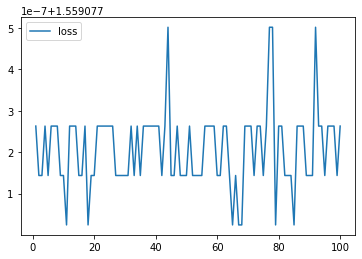

In [10]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(model_moon.history, index=range(1,len(model_moon.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

In [11]:
nn_model.metrics_names

['loss', 'binary_accuracy']

<AxesSubplot:>

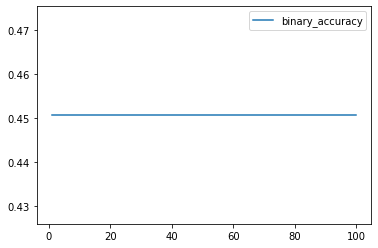

In [15]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(model_moon.history, index=range(1,len(model_moon.history["binary_accuracy"])+1))

# Plot the loss
history_df.plot(y="binary_accuracy")

<AxesSubplot:>

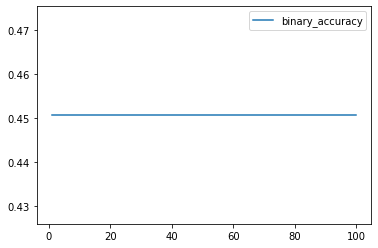

In [16]:
# Plot the loss
history_df.plot(y="binary_accuracy")

In [17]:
# Generate our new Sequential model
new_model = tf.keras.models.Sequential()

In [18]:
# Add the input and hidden layer
number_inputs = 2
number_hidden_nodes = 6

new_model.add(tf.keras.layers.Dense(units=number_hidden_nodes, activation="relu", input_dim=number_inputs))

# Add the output layer that uses a probability activation function
new_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [19]:
# Compile the Sequential model together and customize metrics
new_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fit the model to the training data
new_fit_model = new_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 13s 19ms/step - loss: 0.7943 - accuracy: 0.6861
Epoch 2/100
24/24 [==============================] - 0s 1ms/step - loss: 0.7166 - accuracy: 0.7269
Epoch 3/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6399 - accuracy: 0.7604
Epoch 4/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6042 - accuracy: 0.7772
Epoch 5/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5604 - accuracy: 0.7896
Epoch 6/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5322 - accuracy: 0.7906
Epoch 7/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4960 - accuracy: 0.8034
Epoch 8/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4762 - accuracy: 0.8101
Epoch 9/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4550 - accuracy: 0.8200
Epoch 10/100
24/24 [==============================] - 0s 2ms/step - loss: 0.4237 - accuracy: 0.8377
Epoch 1

Epoch 83/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2601 - accuracy: 0.8833
Epoch 84/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2430 - accuracy: 0.8912
Epoch 85/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2538 - accuracy: 0.8977
Epoch 86/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2631 - accuracy: 0.8871
Epoch 87/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2141 - accuracy: 0.9109
Epoch 88/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2458 - accuracy: 0.8860
Epoch 89/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2348 - accuracy: 0.8914
Epoch 90/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2557 - accuracy: 0.8883
Epoch 91/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2777 - accuracy: 0.8786
Epoch 92/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2528 - accuracy: 0.8839


In [21]:
# Import our dependencies
import pandas as pd
import sklearn as skl

# Read in our ramen data
ramen_df = pd.read_csv("/Users/awebber00/Desktop/Columbia/Module_19/ramen-ratings.csv")

# Print out the Country value counts
country_counts = ramen_df.Country.value_counts()
country_counts

Japan            352
USA              323
South Korea      309
Taiwan           224
Thailand         191
China            169
Malaysia         156
Hong Kong        137
Indonesia        126
Singapore        109
Vietnam          108
UK                69
Philippines       47
Canada            41
India             31
Germany           27
Mexico            25
Australia         22
Netherlands       15
Nepal             14
Myanmar           14
Hungary            9
Pakistan           9
Bangladesh         7
Colombia           6
Cambodia           5
Brazil             5
Holland            4
Poland             4
Fiji               4
Sweden             3
Sarawak            3
Dubai              3
Finland            3
Ghana              2
Estonia            2
United States      1
Nigeria            1
Name: Country, dtype: int64

<AxesSubplot:ylabel='Density'>

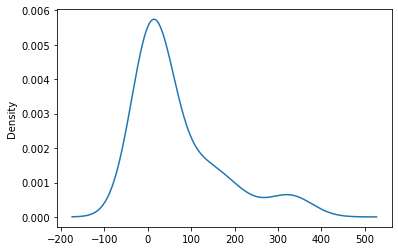

In [22]:
# Visualize the value counts
country_counts.plot.density()

In [23]:
# Determine which values to replace
replace_countries = list(country_counts[country_counts < 100].index)

# Replace in DataFrame
for country in replace_countries:
    ramen_df.Country = ramen_df.Country.replace(country,"Other")


# Check to make sure binning was successful
ramen_df.Country.value_counts()

Other          376
Japan          352
USA            323
South Korea    309
Taiwan         224
Thailand       191
China          169
Malaysia       156
Hong Kong      137
Indonesia      126
Singapore      109
Vietnam        108
Name: Country, dtype: int64

In [24]:
# Create the OneHotEncoder instance
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(sparse=False)

# Fit the encoder and produce encoded DataFrame
encode_df = pd.DataFrame(enc.fit_transform(ramen_df.Country.values.reshape(-1,1)))

# Rename encoded columns
encode_df.columns = enc.get_feature_names(['Country'])
encode_df.head()

,Country_China,Country_Hong Kong,Country_Indonesia,Country_Japan,Country_Malaysia,Country_Other,Country_Singapore,Country_South Korea,Country_Taiwan,Country_Thailand,Country_USA,Country_Vietnam
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
# Merge the two DataFrames together and drop the Country column
ramen_df.merge(encode_df,left_index=True,right_index=True).drop("Country",1)

,Review #,Brand,Variety,Style,Stars,Top Ten,Country_China,Country_Hong Kong,Country_Indonesia,Country_Japan,Country_Malaysia,Country_Other,Country_Singapore,Country_South Korea,Country_Taiwan,Country_Thailand,Country_USA,Country_Vietnam
0,2580,New Touch,T's Restaurant Tantanmen,Cup,3.75,NaN,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,1,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,2.25,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,2.75,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,2576,Ching's Secret,Singapore Curry,Pack,3.75,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2575,5,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,3.5,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2576,4,Wai Wai,Oriental Style Instant Noodles,Pack,1,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2577,3,Wai Wai,Tom Yum Shrimp,Pack,2,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2578,2,Wai Wai,Tom Yum Chili Flavor,Pack,2,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [26]:
# Import our dependencies
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Read in our dataset
hr_df = pd.read_csv("/Users/awebber00/Desktop/Columbia/Module_19/hr_dataset.csv")
hr_df.head()

,Satisfaction_Level,Num_Projects,Time_Spent,Num_Promotions
0,0.30,1,253,2
1,0.25,1,200,0
2,0.90,4,2880,5
3,0.65,3,1450,3
4,0.50,2,785,2


In [27]:
# Create the StandardScaler instance
scaler = StandardScaler()

In [28]:
# Fit the StandardScaler
scaler.fit(hr_df)

StandardScaler()

In [29]:
# Scale the data
scaled_data = scaler.transform(hr_df)

In [30]:
# Create a DataFrame with the scaled data
transformed_scaled_data = pd.DataFrame(scaled_data, columns=hr_df.columns)
transformed_scaled_data.head()

,Satisfaction_Level,Num_Projects,Time_Spent,Num_Promotions
0,-1.303615,-1.162476,-1.049481,-0.558656
1,-1.512945,-1.162476,-1.094603,-1.804887
2,1.208335,0.860233,1.187080,1.310692
3,0.161689,0.185996,-0.030385,0.064460
4,-0.466299,-0.488240,-0.596549,-0.558656


In [31]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

# Import our input dataset
attrition_df = pd.read_csv('/Users/awebber00/Desktop/Columbia/Module_19/HR-Employee-Attrition.csv')
attrition_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [32]:
# Generate our categorical variable list
attrition_cat = attrition_df.dtypes[attrition_df.dtypes == "object"].index.tolist()

In [33]:
# Check the number of unique values in each column
attrition_df[attrition_cat].nunique()

Attrition         2
BusinessTravel    3
Department        3
EducationField    6
Gender            2
JobRole           9
MaritalStatus     3
Over18            1
OverTime          2
dtype: int64

In [34]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(attrition_df[attrition_cat]))

# Add the encoded variable names to the DataFrame
encode_df.columns = enc.get_feature_names(attrition_cat)
encode_df.head()

,Attrition_No,Attrition_Yes,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
1,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
3,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0


In [35]:
# Merge one-hot encoded features and drop the originals
attrition_df = attrition_df.merge(encode_df,left_index=True, right_index=True)
attrition_df = attrition_df.drop(attrition_cat,1)
attrition_df.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,41,1102,1,2,1,1,2,94,3,2,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
1,49,279,8,1,1,2,3,61,2,2,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2,37,1373,2,2,1,4,4,92,2,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
3,33,1392,3,4,1,5,4,56,3,1,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4,27,591,2,1,1,7,1,40,3,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0


In [36]:
# Split our preprocessed data into our features and target arrays
y = attrition_df["Attrition_Yes"].values
X = attrition_df.drop(["Attrition_Yes","Attrition_No"],1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [37]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [38]:
# Define the model - deep neural net
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  8
hidden_nodes_layer2 = 5

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 8)                 448       
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 45        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 6         
Total params: 499
Trainable params: 499
Non-trainable params: 0
_________________________________________________________________


In [39]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [40]:
# Train the model
fit_model = nn.fit(X_train,y_train,epochs=100)

Epoch 1/100
35/35 [==============================] - 1s 2ms/step - loss: 162.5363 - accuracy: 0.5123
Epoch 2/100
35/35 [==============================] - 0s 2ms/step - loss: 26.7335 - accuracy: 0.5735
Epoch 3/100
35/35 [==============================] - 0s 2ms/step - loss: 9.4432 - accuracy: 0.7829
Epoch 4/100
35/35 [==============================] - 0s 3ms/step - loss: 6.1730 - accuracy: 0.7903
Epoch 5/100
35/35 [==============================] - 0s 2ms/step - loss: 3.9823 - accuracy: 0.8391
Epoch 6/100
35/35 [==============================] - 0s 2ms/step - loss: 3.4383 - accuracy: 0.7976
Epoch 7/100
35/35 [==============================] - 0s 5ms/step - loss: 1.7372 - accuracy: 0.8294
Epoch 8/100
35/35 [==============================] - 0s 2ms/step - loss: 1.3039 - accuracy: 0.8155
Epoch 9/100
35/35 [==============================] - 0s 3ms/step - loss: 1.1402 - accuracy: 0.8234
Epoch 10/100
35/35 [==============================] - 0s 2ms/step - loss: 0.8847 - accuracy: 0.8354
Epoch 

Epoch 83/100
35/35 [==============================] - 0s 1ms/step - loss: 0.4696 - accuracy: 0.8303
Epoch 84/100
35/35 [==============================] - 0s 1ms/step - loss: 0.4498 - accuracy: 0.8346
Epoch 85/100
35/35 [==============================] - 0s 1ms/step - loss: 0.4871 - accuracy: 0.8138
Epoch 86/100
35/35 [==============================] - 0s 1ms/step - loss: 0.4766 - accuracy: 0.8127
Epoch 87/100
35/35 [==============================] - 0s 1ms/step - loss: 0.5208 - accuracy: 0.8053
Epoch 88/100
35/35 [==============================] - 0s 2ms/step - loss: 0.5299 - accuracy: 0.8175
Epoch 89/100
35/35 [==============================] - 0s 2ms/step - loss: 0.4910 - accuracy: 0.8199
Epoch 90/100
35/35 [==============================] - 0s 2ms/step - loss: 0.4926 - accuracy: 0.8289
Epoch 91/100
35/35 [==============================] - 0s 1ms/step - loss: 0.5021 - accuracy: 0.8325
Epoch 92/100
35/35 [==============================] - 0s 1ms/step - loss: 0.4911 - accuracy: 0.8233


In [43]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

12/12 - 0s - loss: 0.3970 - accuracy: 0.8723
Loss: 0.3970266282558441, Accuracy: 0.8722826242446899


In [44]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pandas as pd
import tensorflow as tf

# Import our input dataset
diabetes_df = pd.read_csv('/Users/awebber00/Desktop/Columbia/Module_19/diabetes.csv')
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [45]:
# Remove diabetes outcome target from features data
y = diabetes_df.Outcome
X = diabetes_df.drop(columns="Outcome")

# Split training/test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [46]:
# Preprocess numerical data for neural network

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [47]:
# Define the logistic regression model
log_classifier = LogisticRegression(solver="lbfgs",max_iter=200)

# Train the model
log_classifier.fit(X_train,y_train)

# Evaluate the model
y_pred = log_classifier.predict(X_test)
print(f" Logistic regression model accuracy: {accuracy_score(y_test,y_pred):.3f}")

 Logistic regression model accuracy: 0.729


In [48]:
# Define the basic neural network model
nn_model = tf.keras.models.Sequential()
nn_model.add(tf.keras.layers.Dense(units=16, activation="relu", input_dim=8))
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=50)

# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/50
18/18 [==============================] - 1s 1ms/step - loss: 1.0525 - accuracy: 0.3814
Epoch 2/50
18/18 [==============================] - 0s 2ms/step - loss: 0.9641 - accuracy: 0.3584
Epoch 3/50
18/18 [==============================] - 0s 2ms/step - loss: 0.8700 - accuracy: 0.3519
Epoch 4/50
18/18 [==============================] - 0s 2ms/step - loss: 0.8608 - accuracy: 0.3302
Epoch 5/50
18/18 [==============================] - 0s 2ms/step - loss: 0.8035 - accuracy: 0.3778
Epoch 6/50
18/18 [==============================] - 0s 2ms/step - loss: 0.7400 - accuracy: 0.4490
Epoch 7/50
18/18 [==============================] - 0s 2ms/step - loss: 0.7114 - accuracy: 0.4900
Epoch 8/50
18/18 [==============================] - 0s 1ms/step - loss: 0.6800 - accuracy: 0.5468
Epoch 9/50
18/18 [==============================] - 0s 2ms/step - loss: 0.6410 - accuracy: 0.6491
Epoch 10/50
18/18 [==============================] - 0s 2ms/step - loss: 0.6509 - accuracy: 0.6228
Epoch 11/50
18/18 [

In [49]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
import pandas as pd
import tensorflow as tf

# Import our input dataset
tele_df = pd.read_csv('/Users/awebber00/Desktop/Columbia/Module_19/bank_telemarketing.csv')
tele_df.head()

,Age,Job,Marital_Status,Education,Default_Credit,Housing_Loan,Personal_Loan,Subscribed
0,56,other,married,Primary_Education,no,no,no,no
1,37,services,married,Secondary_Education,no,yes,no,no
2,40,admin,married,Primary_Education,no,no,no,no
3,56,services,married,Secondary_Education,no,no,yes,no
4,59,admin,married,Professional_Education,no,no,no,no


In [50]:
# Generate our categorical variable list
tele_cat = tele_df.dtypes[tele_df.dtypes == "object"].index.tolist()


# Check the number of unique values in each column
tele_df[tele_cat].nunique()

Job               9
Marital_Status    3
Education         4
Default_Credit    2
Housing_Loan      2
Personal_Loan     2
Subscribed        2
dtype: int64

In [51]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(tele_df[tele_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(tele_cat)
encode_df.head()

,Job_admin,Job_blue-collar,Job_entrepreneur,Job_management,Job_other,Job_retired,Job_self-employed,Job_services,Job_technician,Marital_Status_divorced,...,Education_Secondary_Education,Education_Tertiary_Education,Default_Credit_no,Default_Credit_yes,Housing_Loan_no,Housing_Loan_yes,Personal_Loan_no,Personal_Loan_yes,Subscribed_no,Subscribed_yes
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [52]:
# Merge one-hot encoded features and drop the originals
tele_df = tele_df.merge(encode_df,left_index=True, right_index=True)
tele_df = tele_df.drop(tele_cat,1)
tele_df.head()

,Age,Job_admin,Job_blue-collar,Job_entrepreneur,Job_management,Job_other,Job_retired,Job_self-employed,Job_services,Job_technician,...,Education_Secondary_Education,Education_Tertiary_Education,Default_Credit_no,Default_Credit_yes,Housing_Loan_no,Housing_Loan_yes,Personal_Loan_no,Personal_Loan_yes,Subscribed_no,Subscribed_yes
0,56,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,37,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
2,40,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,56,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
4,59,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [53]:
# Remove loan status target from features data
y = tele_df.Subscribed_yes.values
X = tele_df.drop(columns=["Subscribed_no","Subscribed_yes"]).values

# Split training/test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [54]:
# Create the SVM model
svm = SVC(kernel='linear')

In [55]:
# Train the model
svm.fit(X_train, y_train)

SVC(kernel='linear')

In [56]:
# Evaluate the model
y_pred = svm.predict(X_test_scaled)
print(f" SVM model accuracy: {accuracy_score(y_test,y_pred):.3f}")

 SVM model accuracy: 0.873


In [57]:
# Define the model - deep neural net
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 =  10
hidden_nodes_layer2 = 5

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))


# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the Sequential model together and customize metrics
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [58]:
# Train the model 
fit_model = nn.fit(X_train_scaled, y_train, epochs=50) 
# Evaluate the model using the test data 
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/50
715/715 [==============================] - 4s 2ms/step - loss: 0.4523 - accuracy: 0.8421
Epoch 2/50
715/715 [==============================] - 1s 2ms/step - loss: 0.3728 - accuracy: 0.8725
Epoch 3/50
715/715 [==============================] - 1s 2ms/step - loss: 0.3732 - accuracy: 0.8720
Epoch 4/50
715/715 [==============================] - 1s 2ms/step - loss: 0.3670 - accuracy: 0.8744
Epoch 5/50
715/715 [==============================] - 1s 2ms/step - loss: 0.3643 - accuracy: 0.8754: 0s - loss: 0.3640 - accuracy: 0.
Epoch 6/50
715/715 [==============================] - 1s 2ms/step - loss: 0.3686 - accuracy: 0.8740
Epoch 7/50
715/715 [==============================] - 1s 2ms/step - loss: 0.3705 - accuracy: 0.8723
Epoch 8/50
715/715 [==============================] - 1s 2ms/step - loss: 0.3619 - accuracy: 0.8776
Epoch 9/50
715/715 [==============================] - 1s 2ms/step - loss: 0.3654 - accuracy: 0.8749
Epoch 10/50
715/715 [==============================] - 1s 2ms/step

In [59]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import tensorflow as tf

# Import our input dataset
loans_df = pd.read_csv('/Users/awebber00/Desktop/Columbia/Module_19/loan_status.csv')
loans_df.head()

,Loan_Status,Current_Loan_Amount,Term,Credit_Score,Annual_Income,Years_in_current_job,Home_Ownership,Purpose,Monthly_Debt,Years_of_Credit_History,Months_since_last_delinquent,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens
0,Fully_Paid,99999999,Short_Term,741.0,2231892.0,8_years,Own_Home,Debt_Consolidation,29200.53,14.9,29.0,18,1,297996,750090.0,0.0,0.0
1,Fully_Paid,217646,Short_Term,730.0,1184194.0,<_1_year,Home_Mortgage,Debt_Consolidation,10855.08,19.6,10.0,13,1,122170,272052.0,1.0,0.0
2,Fully_Paid,548746,Short_Term,678.0,2559110.0,2_years,Rent,Debt_Consolidation,18660.28,22.6,33.0,4,0,437171,555038.0,0.0,0.0
3,Fully_Paid,99999999,Short_Term,728.0,714628.0,3_years,Rent,Debt_Consolidation,11851.06,16.0,76.0,16,0,203965,289784.0,0.0,0.0
4,Fully_Paid,99999999,Short_Term,740.0,776188.0,<_1_year,Own_Home,Debt_Consolidation,11578.22,8.5,25.0,6,0,134083,220220.0,0.0,0.0


In [60]:
# Generate our categorical variable list
loans_cat = loans_df.dtypes[loans_df.dtypes == "object"].index.tolist()

# Check the number of unique values in each column
loans_df[loans_cat].nunique()

Loan_Status              2
Term                     2
Years_in_current_job    11
Home_Ownership           4
Purpose                  7
dtype: int64

In [61]:
# Check the unique value counts to see if binning is required
loans_df.Years_in_current_job.value_counts()

10+_years    13149
2_years       3225
3_years       2997
<_1_year      2699
5_years       2487
4_years       2286
1_year        2247
6_years       2109
7_years       2082
8_years       1675
9_years       1467
Name: Years_in_current_job, dtype: int64

In [62]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(loans_df[loans_cat]))

# Add the encoded variable names to the DataFrame
encode_df.columns = enc.get_feature_names(loans_cat)
encode_df.head()

,Loan_Status_Fully_Paid,Loan_Status_Not_Paid,Term_Long_Term,Term_Short_Term,Years_in_current_job_10+_years,Years_in_current_job_1_year,Years_in_current_job_2_years,Years_in_current_job_3_years,Years_in_current_job_4_years,Years_in_current_job_5_years,...,Home_Ownership_Home_Mortgage,Home_Ownership_Own_Home,Home_Ownership_Rent,Purpose_Business_Loan,Purpose_Buy_House,Purpose_Buy_a_Car,Purpose_Debt_Consolidation,Purpose_Home_Improvements,Purpose_Medical_Bills,Purpose_Other
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [63]:
# Merge one-hot encoded features and drop the originals
loans_df = loans_df.merge(encode_df,left_index=True, right_index=True)
loans_df = loans_df.drop(loans_cat,1)
loans_df.head()

,Current_Loan_Amount,Credit_Score,Annual_Income,Monthly_Debt,Years_of_Credit_History,Months_since_last_delinquent,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,...,Home_Ownership_Home_Mortgage,Home_Ownership_Own_Home,Home_Ownership_Rent,Purpose_Business_Loan,Purpose_Buy_House,Purpose_Buy_a_Car,Purpose_Debt_Consolidation,Purpose_Home_Improvements,Purpose_Medical_Bills,Purpose_Other
0,99999999,741.0,2231892.0,29200.53,14.9,29.0,18,1,297996,750090.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,217646,730.0,1184194.0,10855.08,19.6,10.0,13,1,122170,272052.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,548746,678.0,2559110.0,18660.28,22.6,33.0,4,0,437171,555038.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,99999999,728.0,714628.0,11851.06,16.0,76.0,16,0,203965,289784.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,99999999,740.0,776188.0,11578.22,8.5,25.0,6,0,134083,220220.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [64]:
# Remove loan status target from features data
y = loans_df.Loan_Status_Fully_Paid
X = loans_df.drop(columns=["Loan_Status_Fully_Paid","Loan_Status_Not_Paid"])

# Split training/test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [65]:
# Create a random forest classifier.
rf_model = RandomForestClassifier(n_estimators=128, random_state=78)

# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred = rf_model.predict(X_test_scaled)
print(f" Random forest predictive accuracy: {accuracy_score(y_test,y_pred):.3f}")

 Random forest predictive accuracy: 0.849


In [66]:
# Define the model - deep neural net
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 =  24
hidden_nodes_layer2 = 12

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))


# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the Sequential model together and customize metrics
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=50)

# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/50
854/854 [==============================] - 2s 2ms/step - loss: 0.4760 - accuracy: 0.7962
Epoch 2/50
854/854 [==============================] - 1s 2ms/step - loss: 0.3944 - accuracy: 0.8455
Epoch 3/50
854/854 [==============================] - 1s 2ms/step - loss: 0.3802 - accuracy: 0.8520: 0s - loss: 0.3797 - 
Epoch 4/50
854/854 [==============================] - 2s 2ms/step - loss: 0.3746 - accuracy: 0.8523
Epoch 5/50
854/854 [==============================] - 3s 3ms/step - loss: 0.3756 - accuracy: 0.8502
Epoch 6/50
854/854 [==============================] - 2s 2ms/step - loss: 0.3722 - accuracy: 0.8530
Epoch 7/50
854/854 [==============================] - 2s 2ms/step - loss: 0.3767 - accuracy: 0.8506
Epoch 8/50
854/854 [==============================] - 1s 2ms/step - loss: 0.3750 - accuracy: 0.8499
Epoch 9/50
854/854 [==============================] - 1s 1ms/step - loss: 0.3740 - accuracy: 0.8499
Epoch 10/50
854/854 [==============================] - 1s 1ms/step - loss: 0.3

In [68]:
# Define the model - deep neural net
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 =  24
hidden_nodes_layer2 = 12

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))


# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 24)                888       
_________________________________________________________________
dense_14 (Dense)             (None, 12)                300       
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 13        
Total params: 1,201
Trainable params: 1,201
Non-trainable params: 0
_________________________________________________________________


In [69]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

In [70]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=100)

# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100,callbacks=[cp_callback])

# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/100
 89/854 [==>...........................] - ETA: 1s - loss: 0.6010 - accuracy: 0.6990
Epoch 00001: saving model to checkpoints/weights.01.hdf5
193/854 [=====>........................] - ETA: 4s - loss: 0.5571 - accuracy: 0.7410
Epoch 00001: saving model to checkpoints/weights.01.hdf5
290/854 [=========>....................] - ETA: 2s - loss: 0.5344 - accuracy: 0.7603
Epoch 00001: saving model to checkpoints/weights.01.hdf5
373/854 [============>.................] - ETA: 2s - loss: 0.5192 - accuracy: 0.7720
Epoch 00001: saving model to checkpoints/weights.01.hdf5
469/854 [===============>..............] - ETA: 1s - loss: 0.5054 - accuracy: 0.7820
Epoch 00001: saving model to checkpoints/weights.01.hdf5
574/854 [===================>..........] - ETA: 0s - loss: 0.4941 - accuracy: 0.7898
Epoch 00001: saving model to checkpoints/weights.01.hdf5
681/854 [======================>.......] - ETA: 0s - loss: 0.4850 - accuracy: 0.7959
Epoch 00001: saving model to checkpoints/weights.01

258/854 [========>.....................] - ETA: 1s - loss: 0.3781 - accuracy: 0.8467
Epoch 00007: saving model to checkpoints/weights.07.hdf5
359/854 [===========>..................] - ETA: 1s - loss: 0.3768 - accuracy: 0.8480
Epoch 00007: saving model to checkpoints/weights.07.hdf5
471/854 [===============>..............] - ETA: 0s - loss: 0.3758 - accuracy: 0.8490
Epoch 00007: saving model to checkpoints/weights.07.hdf5
547/854 [==================>...........] - ETA: 0s - loss: 0.3753 - accuracy: 0.8495
Epoch 00007: saving model to checkpoints/weights.07.hdf5
652/854 [=====================>........] - ETA: 0s - loss: 0.3753 - accuracy: 0.8495
Epoch 00007: saving model to checkpoints/weights.07.hdf5
770/854 [==========================>...] - ETA: 0s - loss: 0.3754 - accuracy: 0.8496
Epoch 00007: saving model to checkpoints/weights.07.hdf5
854/854 [==============================] - 2s 2ms/step - loss: 0.3755 - accuracy: 0.8495
Epoch 8/100
  1/854 [..............................] - ETA:

424/854 [=============>................] - ETA: 0s - loss: 0.3683 - accuracy: 0.8540
Epoch 00013: saving model to checkpoints/weights.13.hdf5
530/854 [=================>............] - ETA: 0s - loss: 0.3700 - accuracy: 0.8526
Epoch 00013: saving model to checkpoints/weights.13.hdf5
630/854 [=====================>........] - ETA: 0s - loss: 0.3709 - accuracy: 0.8518
Epoch 00013: saving model to checkpoints/weights.13.hdf5
740/854 [========================>.....] - ETA: 0s - loss: 0.3714 - accuracy: 0.8515
Epoch 00013: saving model to checkpoints/weights.13.hdf5
851/854 [============================>.] - ETA: 0s - loss: 0.3717 - accuracy: 0.8512
Epoch 00013: saving model to checkpoints/weights.13.hdf5
854/854 [==============================] - 2s 2ms/step - loss: 0.3717 - accuracy: 0.8512
Epoch 14/100
 96/854 [==>...........................] - ETA: 1s - loss: 0.3648 - accuracy: 0.8493
Epoch 00014: saving model to checkpoints/weights.14.hdf5
180/854 [=====>........................] - ETA

603/854 [====================>.........] - ETA: 0s - loss: 0.3646 - accuracy: 0.8538
Epoch 00019: saving model to checkpoints/weights.19.hdf5
707/854 [=======================>......] - ETA: 0s - loss: 0.3655 - accuracy: 0.8532
Epoch 00019: saving model to checkpoints/weights.19.hdf5
808/854 [===========================>..] - ETA: 0s - loss: 0.3661 - accuracy: 0.8529
Epoch 00019: saving model to checkpoints/weights.19.hdf5
854/854 [==============================] - 2s 2ms/step - loss: 0.3664 - accuracy: 0.8528
Epoch 20/100
 37/854 [>.............................] - ETA: 1s - loss: 0.3671 - accuracy: 0.8542
Epoch 00020: saving model to checkpoints/weights.20.hdf5
150/854 [====>.........................] - ETA: 1s - loss: 0.3563 - accuracy: 0.8602
Epoch 00020: saving model to checkpoints/weights.20.hdf5
251/854 [=======>......................] - ETA: 0s - loss: 0.3583 - accuracy: 0.8585
Epoch 00020: saving model to checkpoints/weights.20.hdf5
372/854 [============>.................] - ETA

784/854 [==========================>...] - ETA: 0s - loss: 0.3603 - accuracy: 0.8560
Epoch 00025: saving model to checkpoints/weights.25.hdf5
854/854 [==============================] - 2s 2ms/step - loss: 0.3609 - accuracy: 0.8556
Epoch 26/100
 38/854 [>.............................] - ETA: 1s - loss: 0.3399 - accuracy: 0.8737
Epoch 00026: saving model to checkpoints/weights.26.hdf5
135/854 [===>..........................] - ETA: 1s - loss: 0.3524 - accuracy: 0.8643
Epoch 00026: saving model to checkpoints/weights.26.hdf5
235/854 [=======>......................] - ETA: 0s - loss: 0.3587 - accuracy: 0.8596
Epoch 00026: saving model to checkpoints/weights.26.hdf5
323/854 [==========>...................] - ETA: 0s - loss: 0.3609 - accuracy: 0.8579
Epoch 00026: saving model to checkpoints/weights.26.hdf5
429/854 [==============>...............] - ETA: 0s - loss: 0.3624 - accuracy: 0.8567
Epoch 00026: saving model to checkpoints/weights.26.hdf5
529/854 [=================>............] - ETA

  1/854 [..............................] - ETA: 2s - loss: 0.3372 - accuracy: 0.8438
Epoch 00032: saving model to checkpoints/weights.32.hdf5
106/854 [==>...........................] - ETA: 1s - loss: 0.3653 - accuracy: 0.8517
Epoch 00032: saving model to checkpoints/weights.32.hdf5
207/854 [======>.......................] - ETA: 0s - loss: 0.3658 - accuracy: 0.8525
Epoch 00032: saving model to checkpoints/weights.32.hdf5
297/854 [=========>....................] - ETA: 0s - loss: 0.3657 - accuracy: 0.8528
Epoch 00032: saving model to checkpoints/weights.32.hdf5
419/854 [=============>................] - ETA: 0s - loss: 0.3663 - accuracy: 0.8524
Epoch 00032: saving model to checkpoints/weights.32.hdf5
518/854 [=================>............] - ETA: 0s - loss: 0.3667 - accuracy: 0.8521
Epoch 00032: saving model to checkpoints/weights.32.hdf5
608/854 [====================>.........] - ETA: 0s - loss: 0.3668 - accuracy: 0.8520
Epoch 00032: saving model to checkpoints/weights.32.hdf5
701/85

177/854 [=====>........................] - ETA: 1s - loss: 0.3683 - accuracy: 0.8476
Epoch 00038: saving model to checkpoints/weights.38.hdf5
271/854 [========>.....................] - ETA: 0s - loss: 0.3695 - accuracy: 0.8480
Epoch 00038: saving model to checkpoints/weights.38.hdf5
382/854 [============>.................] - ETA: 0s - loss: 0.3694 - accuracy: 0.8486
Epoch 00038: saving model to checkpoints/weights.38.hdf5
472/854 [===============>..............] - ETA: 0s - loss: 0.3685 - accuracy: 0.8495
Epoch 00038: saving model to checkpoints/weights.38.hdf5
581/854 [===================>..........] - ETA: 0s - loss: 0.3678 - accuracy: 0.8501
Epoch 00038: saving model to checkpoints/weights.38.hdf5
685/854 [=======================>......] - ETA: 0s - loss: 0.3672 - accuracy: 0.8506
Epoch 00038: saving model to checkpoints/weights.38.hdf5
786/854 [==========================>...] - ETA: 0s - loss: 0.3667 - accuracy: 0.8511
Epoch 00038: saving model to checkpoints/weights.38.hdf5
854/85

352/854 [===========>..................] - ETA: 0s - loss: 0.3554 - accuracy: 0.8580
Epoch 00044: saving model to checkpoints/weights.44.hdf5
457/854 [===============>..............] - ETA: 0s - loss: 0.3560 - accuracy: 0.8576
Epoch 00044: saving model to checkpoints/weights.44.hdf5
557/854 [==================>...........] - ETA: 0s - loss: 0.3564 - accuracy: 0.8574
Epoch 00044: saving model to checkpoints/weights.44.hdf5
654/854 [=====================>........] - ETA: 0s - loss: 0.3565 - accuracy: 0.8574
Epoch 00044: saving model to checkpoints/weights.44.hdf5
760/854 [=========================>....] - ETA: 0s - loss: 0.3569 - accuracy: 0.8573
Epoch 00044: saving model to checkpoints/weights.44.hdf5
854/854 [==============================] - 1s 2ms/step - loss: 0.3574 - accuracy: 0.8570
Epoch 45/100
  1/854 [..............................] - ETA: 1s - loss: 0.4717 - accuracy: 0.7812
Epoch 00045: saving model to checkpoints/weights.45.hdf5
103/854 [==>...........................] - ETA

539/854 [=================>............] - ETA: 0s - loss: 0.3569 - accuracy: 0.8592
Epoch 00050: saving model to checkpoints/weights.50.hdf5
645/854 [=====================>........] - ETA: 0s - loss: 0.3577 - accuracy: 0.8583
Epoch 00050: saving model to checkpoints/weights.50.hdf5
747/854 [=========================>....] - ETA: 0s - loss: 0.3582 - accuracy: 0.8578
Epoch 00050: saving model to checkpoints/weights.50.hdf5
850/854 [============================>.] - ETA: 0s - loss: 0.3585 - accuracy: 0.8574
Epoch 00050: saving model to checkpoints/weights.50.hdf5
854/854 [==============================] - 1s 2ms/step - loss: 0.3585 - accuracy: 0.8574
Epoch 51/100
 79/854 [=>............................] - ETA: 1s - loss: 0.3183 - accuracy: 0.8791
Epoch 00051: saving model to checkpoints/weights.51.hdf5
184/854 [=====>........................] - ETA: 0s - loss: 0.3327 - accuracy: 0.8702
Epoch 00051: saving model to checkpoints/weights.51.hdf5
288/854 [=========>....................] - ETA

718/854 [========================>.....] - ETA: 0s - loss: 0.3572 - accuracy: 0.8561
Epoch 00056: saving model to checkpoints/weights.56.hdf5
826/854 [============================>.] - ETA: 0s - loss: 0.3575 - accuracy: 0.8560
Epoch 00056: saving model to checkpoints/weights.56.hdf5
854/854 [==============================] - 2s 3ms/step - loss: 0.3575 - accuracy: 0.8559
Epoch 57/100
 69/854 [=>............................] - ETA: 1s - loss: 0.3731 - accuracy: 0.8483
Epoch 00057: saving model to checkpoints/weights.57.hdf5
155/854 [====>.........................] - ETA: 1s - loss: 0.3695 - accuracy: 0.8494
Epoch 00057: saving model to checkpoints/weights.57.hdf5
267/854 [========>.....................] - ETA: 1s - loss: 0.3679 - accuracy: 0.8505
Epoch 00057: saving model to checkpoints/weights.57.hdf5
363/854 [===========>..................] - ETA: 1s - loss: 0.3665 - accuracy: 0.8513
Epoch 00057: saving model to checkpoints/weights.57.hdf5
447/854 [==============>...............] - ETA

854/854 [==============================] - 1s 2ms/step - loss: 0.3519 - accuracy: 0.8593
Epoch 63/100
 39/854 [>.............................] - ETA: 1s - loss: 0.3497 - accuracy: 0.8674
Epoch 00063: saving model to checkpoints/weights.63.hdf5
137/854 [===>..........................] - ETA: 1s - loss: 0.3499 - accuracy: 0.8635
Epoch 00063: saving model to checkpoints/weights.63.hdf5
237/854 [=======>......................] - ETA: 0s - loss: 0.3513 - accuracy: 0.8619
Epoch 00063: saving model to checkpoints/weights.63.hdf5
329/854 [==========>...................] - ETA: 0s - loss: 0.3525 - accuracy: 0.8608
Epoch 00063: saving model to checkpoints/weights.63.hdf5
430/854 [==============>...............] - ETA: 0s - loss: 0.3537 - accuracy: 0.8598
Epoch 00063: saving model to checkpoints/weights.63.hdf5
535/854 [=================>............] - ETA: 0s - loss: 0.3551 - accuracy: 0.8587
Epoch 00063: saving model to checkpoints/weights.63.hdf5
630/854 [=====================>........] - ETA

210/854 [======>.......................] - ETA: 0s - loss: 0.3600 - accuracy: 0.8524
Epoch 00069: saving model to checkpoints/weights.69.hdf5
317/854 [==========>...................] - ETA: 0s - loss: 0.3597 - accuracy: 0.8527
Epoch 00069: saving model to checkpoints/weights.69.hdf5
422/854 [=============>................] - ETA: 0s - loss: 0.3587 - accuracy: 0.8533
Epoch 00069: saving model to checkpoints/weights.69.hdf5
525/854 [=================>............] - ETA: 0s - loss: 0.3577 - accuracy: 0.8539
Epoch 00069: saving model to checkpoints/weights.69.hdf5
593/854 [===================>..........] - ETA: 0s - loss: 0.3573 - accuracy: 0.8542
Epoch 00069: saving model to checkpoints/weights.69.hdf5
695/854 [=======================>......] - ETA: 0s - loss: 0.3570 - accuracy: 0.8546
Epoch 00069: saving model to checkpoints/weights.69.hdf5
806/854 [===========================>..] - ETA: 0s - loss: 0.3569 - accuracy: 0.8548
Epoch 00069: saving model to checkpoints/weights.69.hdf5
854/85

404/854 [=============>................] - ETA: 0s - loss: 0.3519 - accuracy: 0.8581
Epoch 00075: saving model to checkpoints/weights.75.hdf5
504/854 [================>.............] - ETA: 0s - loss: 0.3525 - accuracy: 0.8577
Epoch 00075: saving model to checkpoints/weights.75.hdf5
570/854 [===================>..........] - ETA: 0s - loss: 0.3527 - accuracy: 0.8575
Epoch 00075: saving model to checkpoints/weights.75.hdf5
676/854 [======================>.......] - ETA: 0s - loss: 0.3532 - accuracy: 0.8573
Epoch 00075: saving model to checkpoints/weights.75.hdf5
773/854 [==========================>...] - ETA: 0s - loss: 0.3535 - accuracy: 0.8572
Epoch 00075: saving model to checkpoints/weights.75.hdf5
854/854 [==============================] - 1s 2ms/step - loss: 0.3539 - accuracy: 0.8571
Epoch 76/100
 40/854 [>.............................] - ETA: 1s - loss: 0.3738 - accuracy: 0.8444
Epoch 00076: saving model to checkpoints/weights.76.hdf5
122/854 [===>..........................] - ETA

558/854 [==================>...........] - ETA: 0s - loss: 0.3572 - accuracy: 0.8550
Epoch 00081: saving model to checkpoints/weights.81.hdf5
660/854 [======================>.......] - ETA: 0s - loss: 0.3571 - accuracy: 0.8550
Epoch 00081: saving model to checkpoints/weights.81.hdf5
773/854 [==========================>...] - ETA: 0s - loss: 0.3571 - accuracy: 0.8550
Epoch 00081: saving model to checkpoints/weights.81.hdf5
854/854 [==============================] - 1s 2ms/step - loss: 0.3569 - accuracy: 0.8552
Epoch 82/100
  1/854 [..............................] - ETA: 1s - loss: 0.4824 - accuracy: 0.8125
Epoch 00082: saving model to checkpoints/weights.82.hdf5
101/854 [==>...........................] - ETA: 1s - loss: 0.3541 - accuracy: 0.8576
Epoch 00082: saving model to checkpoints/weights.82.hdf5
203/854 [======>.......................] - ETA: 1s - loss: 0.3520 - accuracy: 0.8596
Epoch 00082: saving model to checkpoints/weights.82.hdf5
299/854 [=========>....................] - ETA

728/854 [========================>.....] - ETA: 0s - loss: 0.3624 - accuracy: 0.8511
Epoch 00087: saving model to checkpoints/weights.87.hdf5
854/854 [==============================] - 1s 2ms/step - loss: 0.3616 - accuracy: 0.8517
Epoch 88/100
  1/854 [..............................] - ETA: 2s - loss: 0.5315 - accuracy: 0.7188
Epoch 00088: saving model to checkpoints/weights.88.hdf5
 98/854 [==>...........................] - ETA: 1s - loss: 0.3589 - accuracy: 0.8479
Epoch 00088: saving model to checkpoints/weights.88.hdf5
188/854 [=====>........................] - ETA: 1s - loss: 0.3567 - accuracy: 0.8501
Epoch 00088: saving model to checkpoints/weights.88.hdf5
280/854 [========>.....................] - ETA: 0s - loss: 0.3556 - accuracy: 0.8515
Epoch 00088: saving model to checkpoints/weights.88.hdf5
396/854 [============>.................] - ETA: 0s - loss: 0.3553 - accuracy: 0.8525
Epoch 00088: saving model to checkpoints/weights.88.hdf5
487/854 [================>.............] - ETA

854/854 [==============================] - 1s 2ms/step - loss: 0.3479 - accuracy: 0.8600
Epoch 94/100
 73/854 [=>............................] - ETA: 1s - loss: 0.3421 - accuracy: 0.8612
Epoch 00094: saving model to checkpoints/weights.94.hdf5
175/854 [=====>........................] - ETA: 0s - loss: 0.3471 - accuracy: 0.8606
Epoch 00094: saving model to checkpoints/weights.94.hdf5
278/854 [========>.....................] - ETA: 0s - loss: 0.3488 - accuracy: 0.8599
Epoch 00094: saving model to checkpoints/weights.94.hdf5
343/854 [===========>..................] - ETA: 0s - loss: 0.3496 - accuracy: 0.8594
Epoch 00094: saving model to checkpoints/weights.94.hdf5
458/854 [===============>..............] - ETA: 0s - loss: 0.3499 - accuracy: 0.8592
Epoch 00094: saving model to checkpoints/weights.94.hdf5
562/854 [==================>...........] - ETA: 0s - loss: 0.3501 - accuracy: 0.8591
Epoch 00094: saving model to checkpoints/weights.94.hdf5
666/854 [======================>.......] - ETA

230/854 [=======>......................] - ETA: 1s - loss: 0.3484 - accuracy: 0.8597
Epoch 00100: saving model to checkpoints/weights.100.hdf5
333/854 [==========>...................] - ETA: 0s - loss: 0.3501 - accuracy: 0.8585
Epoch 00100: saving model to checkpoints/weights.100.hdf5
433/854 [==============>...............] - ETA: 0s - loss: 0.3502 - accuracy: 0.8584
Epoch 00100: saving model to checkpoints/weights.100.hdf5
533/854 [=================>............] - ETA: 0s - loss: 0.3505 - accuracy: 0.8583
Epoch 00100: saving model to checkpoints/weights.100.hdf5
623/854 [====================>.........] - ETA: 0s - loss: 0.3506 - accuracy: 0.8582
Epoch 00100: saving model to checkpoints/weights.100.hdf5
730/854 [========================>.....] - ETA: 0s - loss: 0.3508 - accuracy: 0.8582
Epoch 00100: saving model to checkpoints/weights.100.hdf5
831/854 [============================>.] - ETA: 0s - loss: 0.3511 - accuracy: 0.8581
Epoch 00100: saving model to checkpoints/weights.100.hdf5

In [71]:
# Define the model - deep neural net
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 =  24
hidden_nodes_layer2 = 12

nn_new = tf.keras.models.Sequential()

# First hidden layer
nn_new.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn_new.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn_new.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the model
nn_new.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Restore the model weights
nn_new.load_weights("checkpoints/weights.100.hdf5")

# Evaluate the model using the test data
model_loss, model_accuracy = nn_new.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

285/285 - 0s - loss: 0.4023 - accuracy: 0.8447
Loss: 0.4023355543613434, Accuracy: 0.8447177410125732


In [72]:
# Export our model to HDF5 file
nn_new.save("/Users/awebber00/Desktop/Columbia/Module_19/trained_attrition.h5")

In [74]:
# Import the model to a new object
nn_imported = tf.keras.models.load_model('/Users/awebber00/Desktop/Columbia/Module_19/trained_attrition.h5')

In [75]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_new.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

285/285 - 0s - loss: 0.4023 - accuracy: 0.8447
Loss: 0.4023355543613434, Accuracy: 0.8447177410125732
